DICE ANALOGY
We rolled the die 50 times and got 12 sixes.
If the die is fair (p = 0.1667), is 12 sixes suspicious?



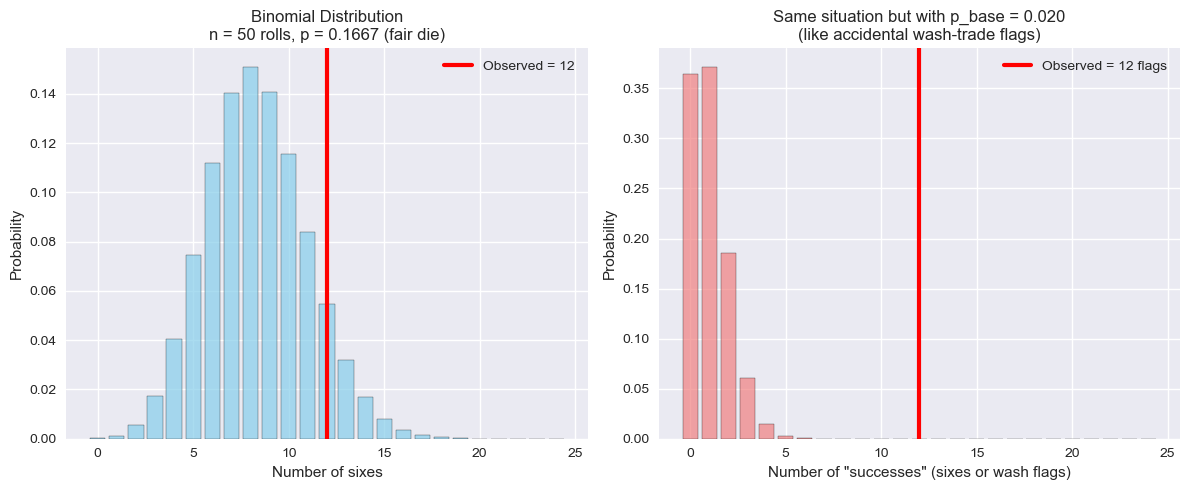


P-VALUE RESULTS
Fair die (p = 0.1667):     p-value = 0.117308 → not suspicious at all
   → Looks perfectly normal

Wash-trade null (p = 0.020): p-value = 0.00000000024531080466
   → EXTREMELY UNLIKELY BY CHANCE


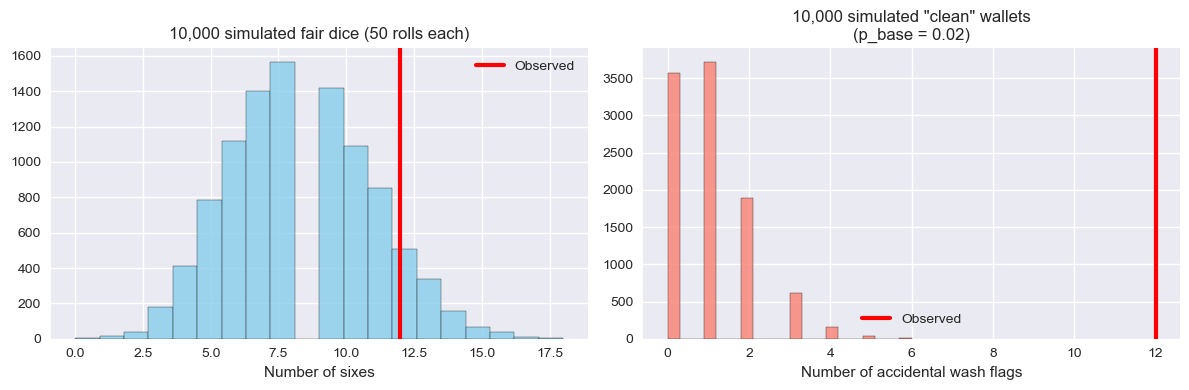


Out of 10,000 clean simulations with p_base = 0.02:
Number of times we saw 12 or more flags: 0 → roughly p-value ≈ 0.0000000000


In [1]:
# ===============================================
#   DICE ANALOGY: "Is this die loaded to roll 6 too often?"
#   This is exactly the same math as wash-trade detection!
# ===============================================

import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import binom, binomtest
import pandas as pd

# Make plots look nice
plt.style.use('seaborn-v0_8')
sns.set_palette("husl")

# ------------------------------------------------------------------
# Scenario: A normal die has P(6) = 1/6 ≈ 0.1667
# But we suspect someone is using a loaded die that rolls 6 more often
# ------------------------------------------------------------------

p_fair = 1/6          # fair die: probability of rolling a 6
p_base = 0.02         # our "null hypothesis" in wash trading: only 2% of trades get flagged by accident
n_rolls = 50          # the suspicious person rolled the die 50 times
k_sixes = 12          # and got 12 sixes → is this normal?

print("DICE ANALOGY")
print(f"We rolled the die {n_rolls} times and got {k_sixes} sixes.")
print(f"If the die is fair (p = {p_fair:.4f}), is 12 sixes suspicious?\n")

# ------------------------------------------------------------------
# 1. Plot the probability distribution under the FAIR die (p_fair
# ------------------------------------------------------------------
x = np.arange(0, 25)  # possible number of sixes
pmf_fair = binom.pmf(x, n_rolls, p_fair)

plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.bar(x, pmf_fair, alpha=0.7, color='skyblue', edgecolor='black')
plt.axvline(k_sixes, color='red', linewidth=3, label=f'Observed = {k_sixes}')
plt.title(f'Binomial Distribution\nn = {n_rolls} rolls, p = {p_fair:.4f} (fair die)')
plt.xlabel('Number of sixes')
plt.ylabel('Probability')
plt.legend()

# ------------------------------------------------------------------
# 2. Now use a very low "background" probability — like wash-trade false positives
# ------------------------------------------------------------------
pmf_suspicious = binom.pmf(x, n_rolls, p_base)

plt.subplot(1, 2, 2)
plt.bar(x, pmf_suspicious, alpha=0.7, color='lightcoral', edgecolor='black')
plt.axvline(k_sixes, color='red', linewidth=3, label=f'Observed = {k_sixes} flags')
plt.title(f'Same situation but with p_base = {p_base:.3f}\n(like accidental wash-trade flags)')
plt.xlabel('Number of "successes" (sixes or wash flags)')
plt.ylabel('Probability')
plt.legend()

plt.tight_layout()
plt.show()

# ------------------------------------------------------------------
# 3. Calculate the p-value (exact binomial test)
# ------------------------------------------------------------------
# Fair die case
pval_fair = binomtest(k_sixes, n_rolls, p_fair, alternative='greater').pvalue

# Wash-trade-like case (very low background rate)
pval_wash = binomtest(k_sixes, n_rolls, p_base, alternative='greater').pvalue

print("\nP-VALUE RESULTS")
print("="*50)
print(f"Fair die (p = {p_fair:.4f}):     p-value = {pval_fair:.6f} → not suspicious at all")
if pval_fair < 0.05:
    print("   → We would reject the fair die! (but actually it's normal here)")
else:
    print("   → Looks perfectly normal")

print(f"\nWash-trade null (p = {p_base:.3f}): p-value = {pval_wash:.20f}")
print(f"   → {'EXTREMELY UNLIKELY BY CHANCE' if pval_wash < 1e-6 else 'possible by chance'}")

# ------------------------------------------------------------------
# 4. Show many simulated wallets/dice to see the full distribution
# ------------------------------------------------------------------
np.random.seed(42)
n_simulations = 10000
simulated_sixes_fair = binom.rvs(n_rolls, p_fair, size=n_simulations)
simulated_flags_low = binom.rvs(n_rolls, p_base, size=n_simulations)

plt.figure(figsize=(12, 4))

plt.subplot(1, 2, 1)
plt.hist(simulated_sixes_fair, bins=20, alpha=0.8, color='skyblue', edgecolor='black')
plt.axvline(k_sixes, color='red', linewidth=3, label='Observed')
plt.title('10,000 simulated fair dice (50 rolls each)')
plt.xlabel('Number of sixes')
plt.legend()

plt.subplot(1, 2, 2)
plt.hist(simulated_flags_low, bins=20, alpha=0.8, color='salmon', edgecolor='black')
plt.axvline(k_sixes, color='red', linewidth=3, label='Observed')
plt.title(f'10,000 simulated "clean" wallets\n(p_base = {p_base})')
plt.xlabel('Number of accidental wash flags')
plt.legend()

plt.tight_layout()
plt.show()

print(f"\nOut of 10,000 clean simulations with p_base = {p_base}:")
print(f"Number of times we saw {k_sixes} or more flags: "
      f"{(simulated_flags_low >= k_sixes).sum()} → roughly p-value ≈ "
      f"{(simulated_flags_low >= k_sixes).sum() / n_simulations:.10f}")